# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
gold_data = pd.read_csv('GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [3]:
gold_data.set_index('Date',inplace = True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


In [4]:
gold_filter = gold_data.dropna()
gold_filter

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


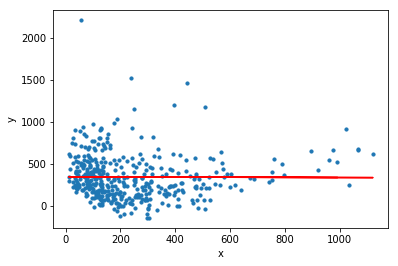

In [6]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = np.array(gold_filter["Pred"])
x = np.array(gold_filter["new"])

x = x.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
predicted = model.predict(x)

rmse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, predicted, color='r')
plt.show()

In [7]:
pre_data = gold_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (model.predict(pre_data_new))
gold_data['Pred'] = na_data
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,342.168758,182.427089
"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,342.507637,141.255137
"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,342.682017,120.069010
"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,341.872658,218.401641


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


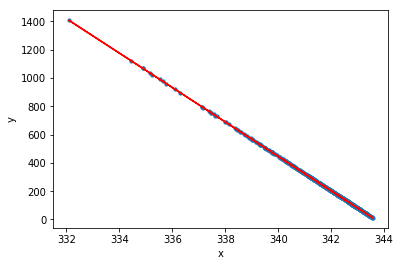

In [8]:
#dataset
y = np.array(gold_data["new"])
x = np.array(gold_data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

predicted = model.predict(x)

rmse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, predicted, color='r')
plt.show()

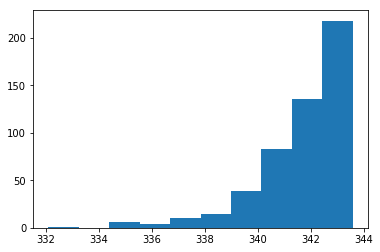

In [9]:
plt.hist(gold_data['Pred'])
plt.show()

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


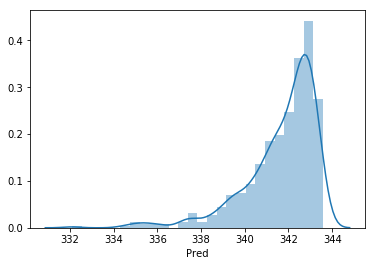

In [10]:
import seaborn as sns
sns.distplot(gold_data['Pred'])
plt.show()

In [11]:
tcs = pd.read_csv('TCS.csv')
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs = tcs.sort_values('Date')
tcs.set_index('Date', inplace=True)
tcs

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
2017-05-22,TCS,EQ,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27
2017-05-23,TCS,EQ,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44
2017-05-24,TCS,EQ,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48
2017-05-25,TCS,EQ,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67


In [12]:
nifty = pd.read_csv('Nifty50.csv')
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty = nifty.sort_values('Date')
nifty.set_index('Date', inplace=True)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26


In [13]:
tcs_fil = tcs[405:]
nifty_fil = nifty[405:]

In [14]:
tcs_return = tcs_fil['Close Price'].pct_change()
nifty_return = nifty_fil['Close'].pct_change()

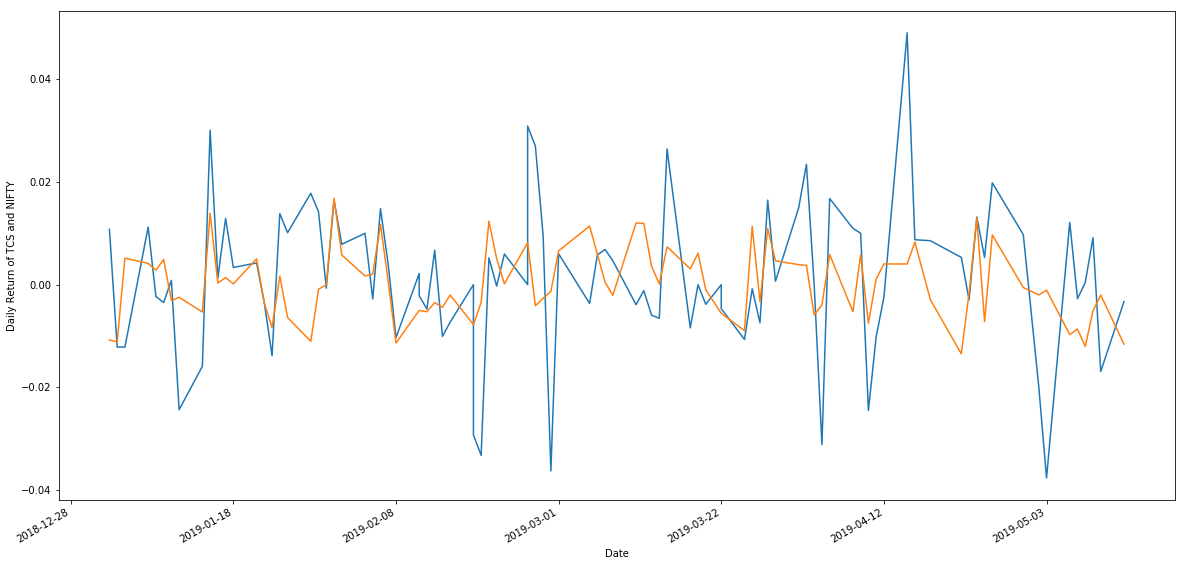

In [15]:
plt.figure(figsize=(20,10))
tcs_return.plot()
nifty_return.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [24]:
tcs_fil['pct_change'] = tcs_fil['Close Price'].pct_change()
nifty_fil['pct_change'] = nifty_fil['Close'].pct_change()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
x = tcs_fil['pct_change'].dropna()
y = nifty_fil['pct_change'].dropna()
y = y.add(x)
import statsmodels.api as sm
myModel = sm.OLS(y,x,missing='drop').fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pct_change   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     628.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.21e-42
Time:                        22:34:02   Log-Likelihood:                 333.17
No. Observations:                  92   AIC:                            -664.3
Df Residuals:                      91   BIC:                            -661.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     1.1616      0.046     25.075      0.000       1.070       1.254
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.865
Skew:                          -0.015   Prob(JB):                        0.649
Kurtosis:                       2.526   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
import pandas as pd
import statsmodels.api as sm

tcs = pd.read_csv('tcs_data.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('nse_data.csv', parse_dates=True, index_col='Date')

In [39]:
monthly_prices = pd.concat([tcs['Close'], nifty50['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']

print(monthly_prices.head())

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  
print(clean_monthly_returns.head())

                    TCS       NIFTY50
Date                                 
2018-06-30          NaN           NaN
2018-07-31  2078.399902  11680.500000
2018-08-31  2183.699951  10930.450195
2018-09-30  1938.150024  10386.599609
2018-10-31  1968.250000  10876.750000
                 TCS   NIFTY50
Date                          
2018-08-31  0.050664 -0.064214
2018-09-30 -0.112447 -0.049756
2018-10-31  0.015530  0.047191
2018-11-30 -0.038207 -0.001306
2018-12-31  0.063944 -0.002909


In [40]:
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.4814
Date:                Sun, 14 Jul 2019   Prob (F-statistic):              0.504
Time:                        22:35:52   Log-Likelihood:                 23.106
No. Observations:                  12   AIC:                            -42.21
Df Residuals:                      10   BIC:                            -41.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.011     -0.093      0.9

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [ ]:
# past 3 months daily beta value of  stock
# 1.1616 is TCS value which is greater than 1

In [ ]:
# monthly beta value is 0.1327 which is also less than 1